In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn pyod


Note: you may need to restart the kernel to use updated packages.


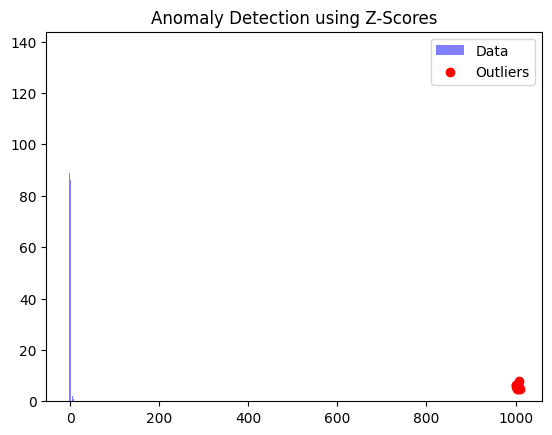

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating sample data
data = np.random.normal(0, 1, 1000)
data = np.concatenate([data, np.random.normal(6, 1, 10)])  # Adding outliers

# Calculating Z-Scores
mean = np.mean(data)
std_dev = np.std(data)
z_scores = [(x - mean) / std_dev for x in data]

# Identifying outliers
outliers = np.where(np.abs(z_scores) > 3)

# Plotting the results
plt.hist(data, bins=30, alpha=0.5, color='b', label='Data')
plt.scatter(outliers[0], data[outliers], color='r', label='Outliers')
plt.title('Anomaly Detection using Z-Scores')
plt.legend()
plt.show()

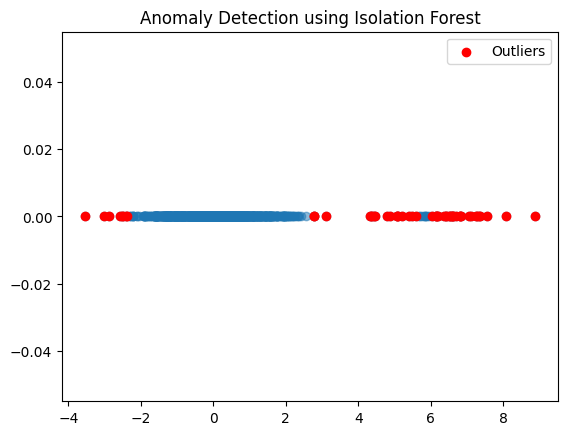

In [3]:
from sklearn.ensemble import IsolationForest

# Sample data
X = np.random.normal(0, 1, (1000, 1))
X = np.vstack([X, np.random.normal(6, 1, (50, 1))])  # Add outliers

# Applying Isolation Forest
model = IsolationForest(contamination=0.05)
model.fit(X)
pred = model.predict(X)

# Identifying outliers
outliers_IF = np.where(pred == -1)[0]

# Plotting results
plt.scatter(X, np.zeros_like(X), alpha=0.5)  # Scatter plot of data
plt.scatter(X[outliers_IF], np.zeros_like(X[outliers_IF]), color='r', label='Outliers')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()

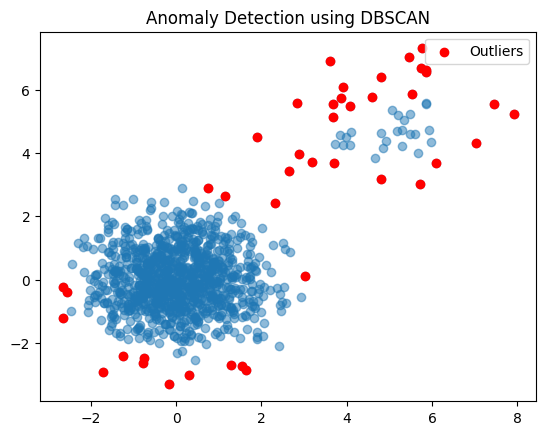

In [4]:
from sklearn.cluster import DBSCAN

# Sample data
X = np.random.normal(0, 1, (1000, 2))
X = np.vstack([X, np.random.normal(5, 1, (50, 2))])  # Add outliers

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred_dbscan = dbscan.fit_predict(X)

# Identifying outliers
outliers_DBSCAN = np.where(pred_dbscan == -1)[0]

# Plotting results
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)  # Scatter plot of data
plt.scatter(X[outliers_DBSCAN, 0], X[outliers_DBSCAN, 1], color='r', label='Outliers')
plt.title('Anomaly Detection using DBSCAN')
plt.legend()
plt.show()

[  28   36   58   65   76   94   98  165  166  170  176  201  235  244
  245  264  277  314  318  320  326  332  340  345  346  361  362  373
  375  376  381  395  419  491  496  540  559  562  601  610  623  624
  627  641  653  687  768  797  810  820  821  831  844  877  902  907
  908  928  957  971 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009
 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023
 1024 1025 1026 1027 1028 1029]
(array([  28,   36,   58,   65,   76,   94,   98,  165,  166,  170,  176,
        201,  235,  244,  245,  264,  277,  314,  318,  320,  326,  332,
        340,  345,  346,  361,  362,  373,  375,  376,  381,  395,  419,
        491,  496,  540,  559,  562,  601,  610,  623,  624,  627,  641,
        653,  687,  768,  797,  810,  820,  821,  831,  844,  877,  902,
        907,  908,  928,  957,  971, 1000, 1001, 1002, 1003, 1004, 1005,
       1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016,
       1017, 1018, 1019, 1020,

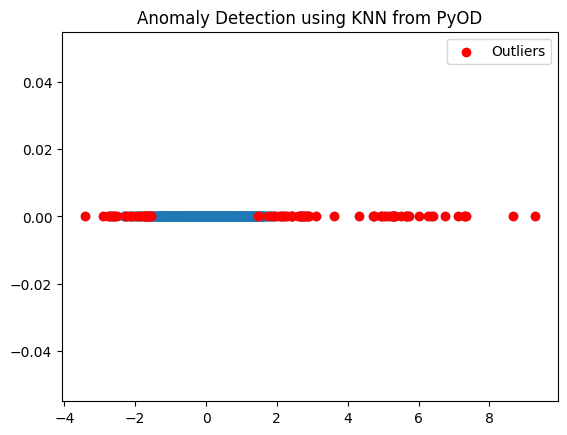

In [8]:
from pyod.models.knn import KNN

# Sample data
X = np.random.normal(0, 1, (1000, 1))
X = np.vstack([X, np.random.normal(6, 1, (30, 1))])  # Adding outliers

# KNN model
model_knn = KNN()  # K-Nearest Neighbors model
model_knn.fit(X)
pred_knn = model_knn.predict(X)

# Identifying outliers
outliers_KNN = np.where(pred_knn == 1)[0]

print(np.where(pred_knn == 1)[0])
print(np.where(pred_knn == 1))

# Plotting results
plt.scatter(X, np.zeros_like(X), alpha=0.5)  # Scatter plot of data
plt.scatter(X[outliers_KNN], np.zeros_like(X[outliers_KNN]), color='r', label='Outliers')
plt.title('Anomaly Detection using KNN from PyOD')
plt.legend()
plt.show()